In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math


Reading Data

In [3]:
data = pd.read_csv('data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print('No. of Rows and Columns of the dataset:\n',data.shape)

No. of Rows and Columns of the dataset:
 (205, 26)


In [5]:
print('Description of data:\n')
data.describe()

Description of data:



,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Checking for nulls

In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Data Cleaning

In [8]:
#splitting company name from carName
CompanyName = data['CarName'].apply(lambda x:x.split(' ')[0])
data.insert(4,'CompanyName',CompanyName)
data.head()

,car_ID,symboling,CarName,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,alfa-romero,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,alfa-romero,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,alfa-romero,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,audi,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,audi,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#correcting spelling
data.CompanyName = data.CompanyName.str.lower()
def replace_name(m,n):
    data.CompanyName.replace(m,n,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen') 

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#checking for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CarName,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Data Visualization

<AxesSubplot: title={'center': 'Spread of Price'}, ylabel='price'>

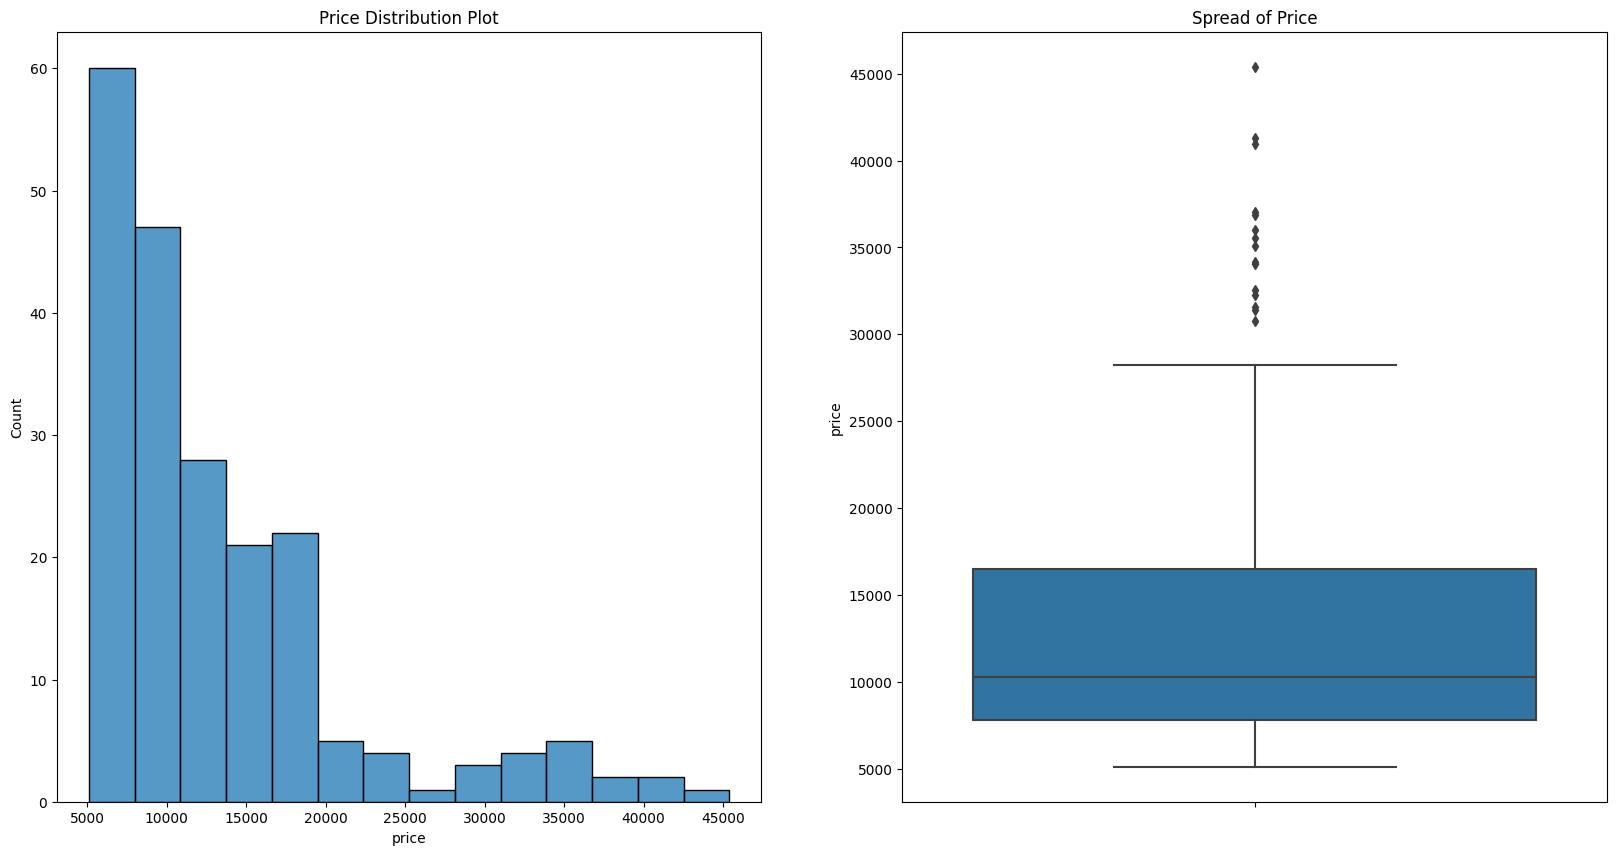

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.histplot(data.price)

plt.subplot(1,2,2)
plt.title('Spread of Price')
sns.boxplot(y=data.price)

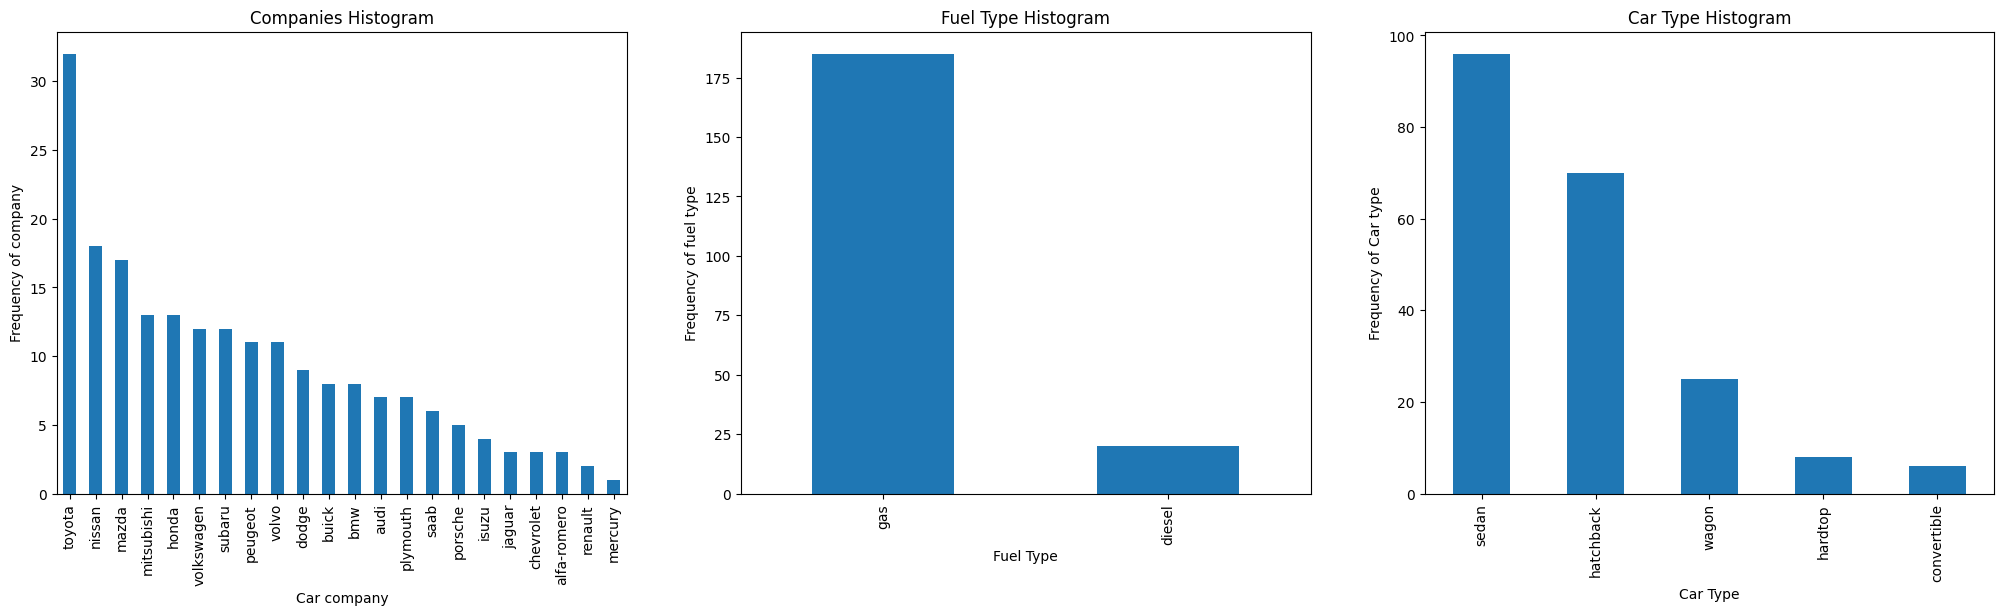

In [12]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt2 = data.fueltype.value_counts().plot(kind ='bar')
plt.title('Fuel Type Histogram')
plt2.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt3 = data.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt3.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Label Encoding

In [13]:
cols = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
        'enginetype','cylindernumber','fuelsystem']
le = LabelEncoder()
for col in cols:
        data[col] = le.fit_transform(data[col])     

data.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   CompanyName       205 non-null    object 
 5   aspiration        205 non-null    int32  
 6   doornumber        205 non-null    int32  
 7   carbody           205 non-null    int32  
 8   drivewheel        205 non-null    int32  
 9   enginelocation    205 non-null    int32  
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    int32  
 16  cylindernumber    205 non-null    int32  
 1

In [14]:
data

,car_ID,symboling,CarName,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,alfa-romero,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,alfa-romero,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,alfa-romero,0,1,2,2,0,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,audi,0,0,3,1,0,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,audi,0,0,3,0,0,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,volvo,0,0,3,2,0,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,volvo,1,0,3,2,0,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,volvo,0,0,3,2,0,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,volvo,1,0,3,2,0,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
df = data[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
           'wheelbase','carlength','carwidth','carheight','curbweight','enginetype',
           'cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio',
           'horsepower','peakrpm','citympg','highwaympg','price']]

df.head()           

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


Feature Correlation

<AxesSubplot: >

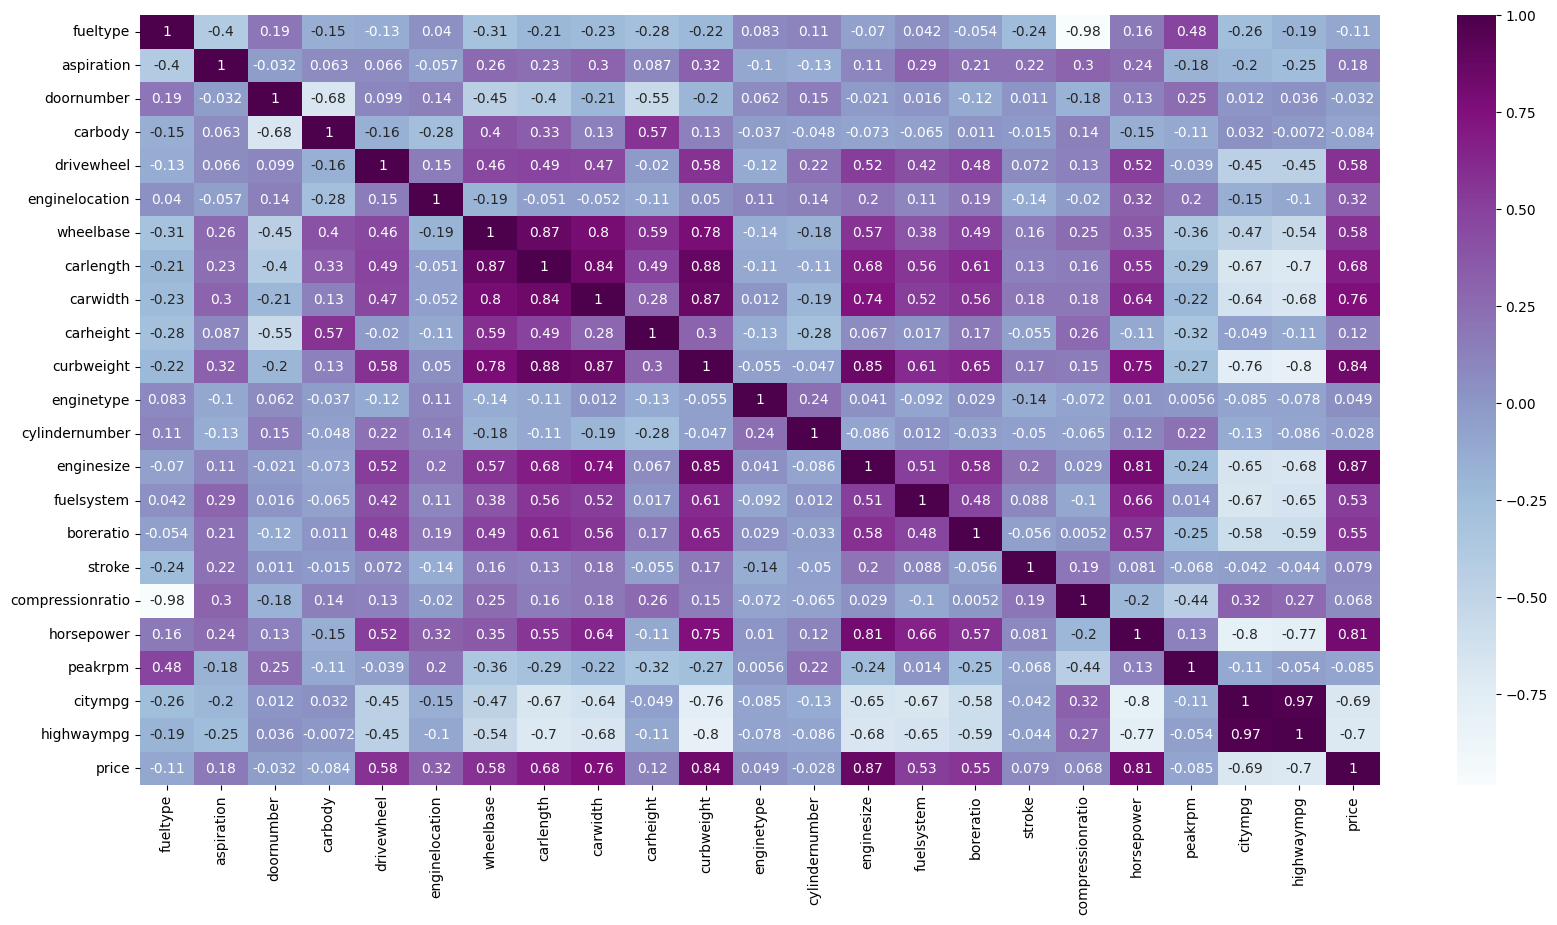

In [16]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='BuPu')

Normalization

In [17]:
scaler = preprocessing.StandardScaler()
x = df.drop(['price'],axis=1)
y = df['price']
Xs = scaler.fit_transform(x)
Xs

array([[ 0.32879797, -0.46929532,  1.13038833, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.32879797, -0.46929532,  1.13038833, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.32879797, -0.46929532,  1.13038833, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 0.32879797, -0.46929532, -0.88465174, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [-3.04138127,  2.13085442, -0.88465174, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 0.32879797,  2.13085442, -0.88465174, ...,  0.57769233,
        -0.95301169, -0.83719538]])

Train-Test Split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(Xs,y,test_size=0.3,random_state=None)

The Model

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Model Evaluation

In [20]:
print('R2 Score:',r2_score(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8597065403374443
Mean Squared Error: 8414609.376256175
Root Mean Square Error: 2900.7946111809047
Mean Absolute Error: 2234.8830770339596


Dropping Features that have low correlation to the label.

In [41]:
df2 = df.drop(['fueltype','aspiration','doornumber','carbody','enginelocation','enginetype','carheight',
              'cylindernumber','stroke','compressionratio','peakrpm','citympg','highwaympg'],axis=1)
Xs2 = scaler.fit_transform(df2)
Xs2              

array([[ 1.21333041, -1.6907718 , -0.42652147, ...,  0.51907138,
         0.17448278,  0.02739114],
       [ 1.21333041, -1.6907718 , -0.42652147, ...,  0.51907138,
         0.17448278,  0.4044611 ],
       [ 1.21333041, -0.70859588, -0.23151305, ..., -2.40488029,
         1.26453643,  0.4044611 ],
       ...,
       [ 1.21333041,  1.72187336,  1.19854871, ...,  0.9262039 ,
         0.75753473,  1.02998314],
       [ 1.21333041,  1.72187336,  1.19854871, ..., -1.18348276,
         0.04773235,  1.15358178],
       [ 1.21333041,  1.72187336,  1.19854871, ...,  1.66644483,
         0.25053303,  1.17303131]])

Train-Test Split once again

In [42]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(Xs2,y,test_size=0.3,random_state=None)

Model v2

In [43]:
model2 = LinearRegression()
model2.fit(x_train2,y_train2)
y_pred2 = model2.predict(x_test2)

Model Evaluation

In [44]:
print('R2 Score:',r2_score(y_test2,y_pred2))
print('Mean Squared Error:',mean_squared_error(y_test2,y_pred2))
print('Root Mean Square Error:',math.sqrt(mean_squared_error(y_test2,y_pred2)))
print('Mean Absolute Error:',mean_absolute_error(y_test2,y_pred2))

R2 Score: 1.0
Mean Squared Error: 7.23516203528237e-23
Root Mean Square Error: 8.505975567377541e-12
Mean Absolute Error: 7.173272728499385e-12


<AxesSubplot: >

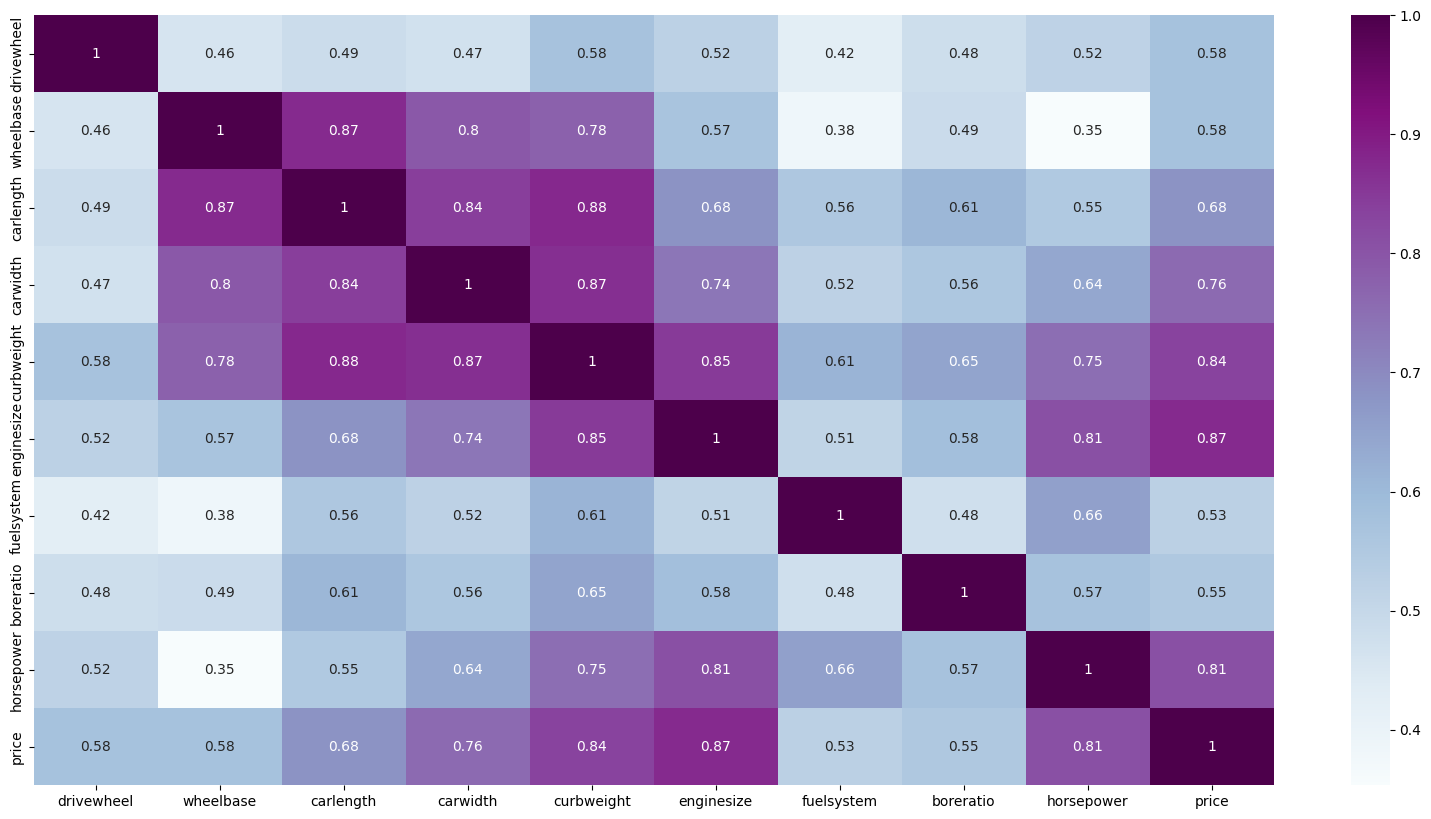

In [45]:
corr = df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='BuPu')